# Streamlined framework of EDA for classification models

This project was designed to streamline the explorarory data analysis of common datasets that contained categorical, numeric and time-based data. The steps below focus on the common cleaning and feature engineering done on datasets to prep them for ML models. 

Since 70% of time taken in data science projects focus on EDA, this tries to recuce time by passing over the commmon steps taken. This was specifically not attuned to object-oriented programming as each cell has its own specific feature that needs to be monitored before continuing with the next step.     

### Concepts taken from: 

The Essential Toolbox for Data Cleaning  - https://towardsdatascience.com/the-simple-yet-practical-data-cleaning-codes-ad27c4ce0a38

Code snippets from CHRIS ALBON-
https://chrisalbon.com/


Data Cleaning with Python - https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

EDA for Feature Selection in ML - http://services.google.com/fh/files/misc/exploratory_data_analysis_for_feature_selection_in_machine_learning.pdf

Pythonic Data Cleaning With Pandas and NumPy - https://realpython.com/python-data-cleaning-numpy-pandas/

Tour of Evaluation Metrics for Imbalanced Classification - https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

A Starter Pack to EDA - https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf

## NOTE 
Some of the topics have been color coded so as to emphasize its use in the code

<span style="color:red">**RED**</span> - Warnings before using <p><p> 
<span style="color:blue">**BLUE**</span> - An option to choose from <p><p>
<span style="color:green">**GREEN**</span> - Experimental development - would like some insights <p><p>


## <span style="color:red">**IMPORTANT**</span>

Features  which require manual addtion of specific column variables are referenced as **col1** 

### Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
import scipy.stats as ss

from datetime import date, time
from dateutil.parser import parse

import missingno as msno 

from math import log
from math import ceil

from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

plt.style.use('seaborn-colorblind')

In [3]:
#Color palette for Box plot
c_palette = ['tab:blue', 'tab:orange']
c_palette3 = ['tab:blue', 'tab:orange', 'tab:green']

### Read the data [CSV]

#### Pandas has a lot more features for reading csv data 

pd.read_csv(*filepath_or_buffer*, *sep=’*, ‘, delimiter=None, header=’infer’, names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, *nrows=None*, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression=’infer’, thousands=None, decimal=b’.’, lineterminator=None, quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)

In [4]:
#File location
DATA_FOLDER = ''

In [5]:
original_df= pd.read_csv(os.path.join(DATA_FOLDER,'bank-additional-full.csv'), sep=';')

### Combine seperate dataframes into one

#### Merging data is done depending on the primary key and what type of join

df.merge(self, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) 

In [ ]:
original_df.merge(self, col1, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) 

### Keep the original dataframe     

In [6]:
df=original_df.copy()

### Initial features

In [7]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [8]:
df.shape

(41188, 21)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# import plotly.figure_factory as ff
# figure = ff.create_scatterplotmatrix(df,diag='histogram')

In [12]:
#sns.pairplot(df)


### Find and drop duplicated values


<span style="color:red">**Check if the duplicated values mean anything significant**</span>

In [13]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
else:
    print("No duplicated entries found")

No. of duplicated entries:  12
       age          job   marital            education  default housing loan  \
28476   24     services    single          high.school       no     yes   no   
28477   24     services    single          high.school       no     yes   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
25183   39       admin.   married    university.degree       no      no   no   
25217   3

In [14]:
#Drop the duplicate
print(f"Dropped {len(df[df.duplicated()])} values")
df.drop_duplicates(inplace=True)

Dropped 12 values


### Null values

In [15]:
df.isnull().sum().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

### In-depth analysis on missing values

In [16]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and a total of "+str(df.shape[0])+" values\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
                      
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 21 columns and a total of 41176 values
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

### Visualize missing values

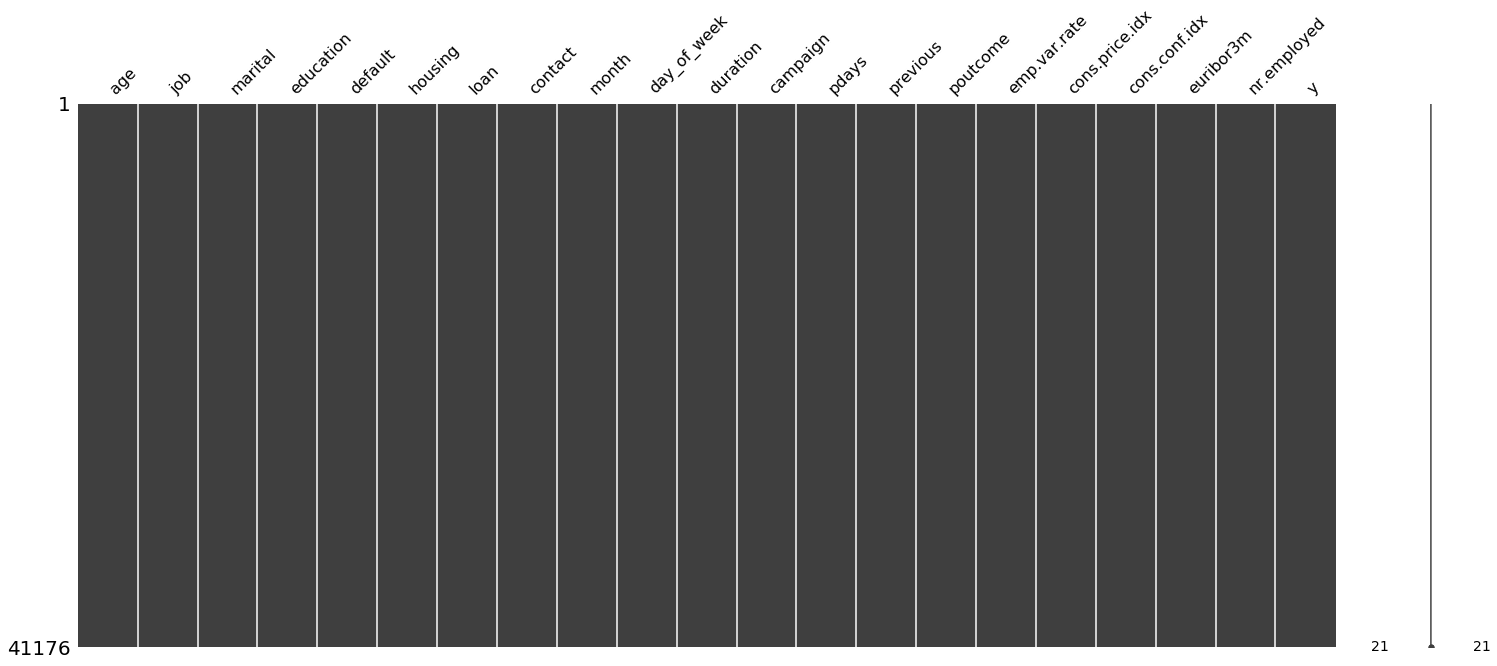

In [18]:
# Visualize missing values as a matrix 
# Checks if the missing values are localized
msno.matrix(df) 

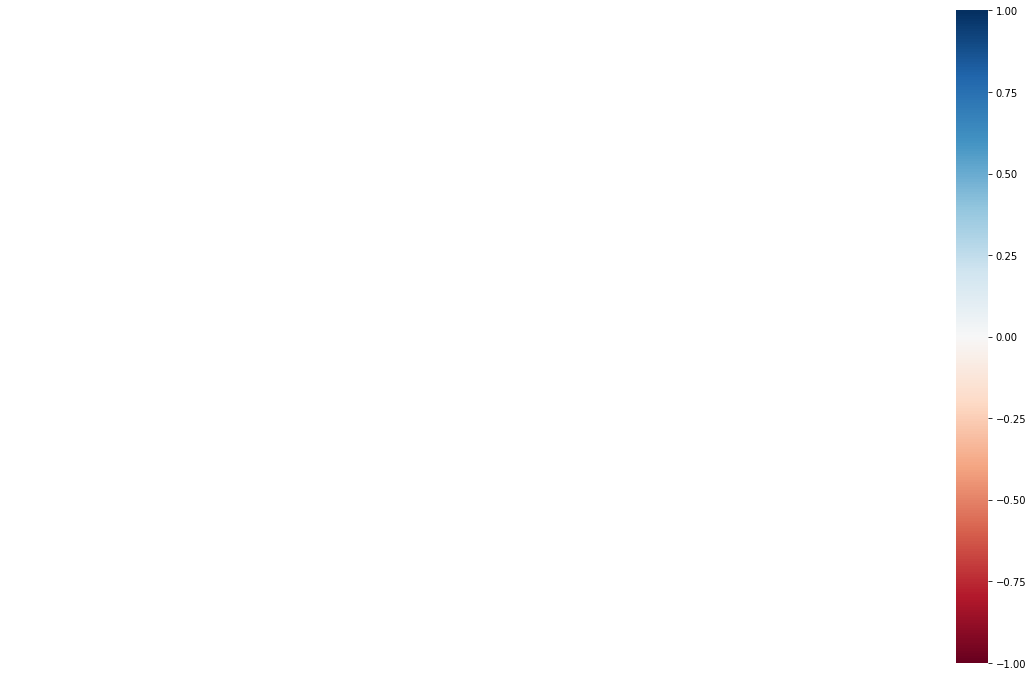

In [19]:
# Visualize missing values as a heatmap 
msno.heatmap(df) 

### Working on missing values

#### <span style="color:blue">**(1) Drop Missing Rows**</span> 

In [20]:
ind_missing = df[df.isna()].count() > 35
ind_missing

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [21]:
df[df.isnull().sum(axis=1) >35]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

In [ ]:
df_less_missing_rows = df.drop(ind_missing, axis=0)

#### <span style="color:blue">**(2) Drop Missing Feature**</span> 

In [ ]:
# drop the feature entirely
cols_to_drop = ['col1']

In [ ]:
df_drop_features = df.drop(cols_to_drop, axis=1)

#### <span style="color:green">**Imputation is done later when we have a better idea about the numeric data**</span> 

### Identify the target variable and shift it to the beginning

In [22]:
target = df['y']
target_name=target.name

In [23]:
df.drop(labels=target_name, axis=1,inplace = True)
df.insert(0,target_name,target)
df.head()

y  age        job  marital    education  default housing loan    contact  \
0  no   56  housemaid  married     basic.4y       no      no   no  telephone   
1  no   57   services  married  high.school  unknown      no   no  telephone   
2  no   37   services  married  high.school       no     yes   no  telephone   
3  no   40     admin.  married     basic.6y       no      no   no  telephone   
4  no   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0           1.1          93.994          -36.4      4.857       5191.0  
1           1.1          93.994          -36.4      4.857       5191.0  
2           1.1          93.994          -36.4      4.857       5191.0  
3           1.1          93.994          -36.4      4.857       5191.0  
4           1.1          93.994          -36.4      4.857       5191.0

### General Statistical Insights

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   y               41176 non-null  object 
 1   age             41176 non-null  int64  
 2   job             41176 non-null  object 
 3   marital         41176 non-null  object 
 4   education       41176 non-null  object 
 5   default         41176 non-null  object 
 6   housing         41176 non-null  object 
 7   loan            41176 non-null  object 
 8   contact         41176 non-null  object 
 9   month           41176 non-null  object 
 10  day_of_week     41176 non-null  object 
 11  duration        41176 non-null  int64  
 12  campaign        41176 non-null  int64  
 13  pdays           41176 non-null  int64  
 14  previous        41176 non-null  int64  
 15  poutcome        41176 non-null  object 
 16  emp.var.rate    41176 non-null  float64
 17  cons.price.idx  41176 non-null 

In [25]:
df.shape

(41176, 21)

In [26]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

<span style="color:green">**Check for imbalances in the classifiers**</span>

Each method is applicable based on the dataset.
Taken from The Machine Learning Mastery website - Evaluation Metrics for Imbalanced Classification


<ul>
<li><strong>Are you predicting probabilities?</strong>
<ul>
<li><strong>Do you need class labels?</strong>
<ul>
<li><strong>Is the positive class more important?</strong>
<ul>
<li>Use Precision-Recall AUC</li>
</ul>
</li>
<li><strong>Are both classes important?</strong>
<ul>
<li>Use ROC AUC</li>
</ul>
</li>
</ul>
</li>
<li><strong>Do you need probabilities?</strong>
<ul>
<li>Use Brier Score and Brier Skill Score</li>
</ul>
</li>
</ul>
</li>
<li><strong>Are you predicting class labels?</strong>
<ul>
<li><strong>Is the positive class more important?</strong>
<ul>
<li><strong>Are False Negatives and False Positives Equally Important?</strong>
<ul>
<li>Use F1-Measure</li>
</ul>
</li>
<li><strong>Are False Negatives More Important?</strong>
<ul>
<li>Use F2-Measure</li>
</ul>
</li>
<li><strong>Are False Positives More Important?</strong>
<ul>
<li>Use F0.5-Measure</li>
</ul>
</li>
</ul>
</li>
<li><strong>Are both classes important?</strong>
<ul>
<li><strong>Do you have &lt; 80%-90% Examples for the Majority Class?&nbsp;</strong>
<ul>
<li>Use Accuracy</li>
</ul>
</li>
<li><strong>Do you have &gt; 80%-90% Examples for the Majority Class?&nbsp;</strong>
<ul>
<li>Use G-Mean</li>
</ul>
</li>
</ul>
</li>
</ul>
</li>
</ul>

### Column-wise analysis

In [27]:
unique_values= df.nunique()
unique_values

y                    2
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64

Checks for columns with varying data values

In [28]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct < 0.75 and top_pct > 0.20:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

job: 25.30357%
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

marital: 60.52312%
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

education: 29.54148%
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

housing: 52.38731%
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

contact: 63.47144%
cellular     26135
telephone    15041
Name: contact, dtype: int64

month: 33.43452%
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631


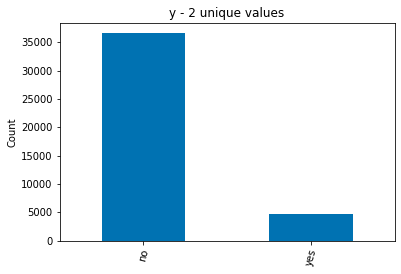

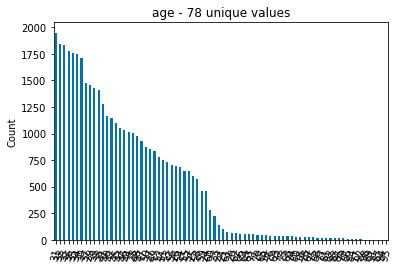

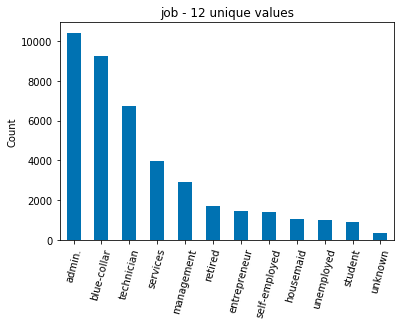

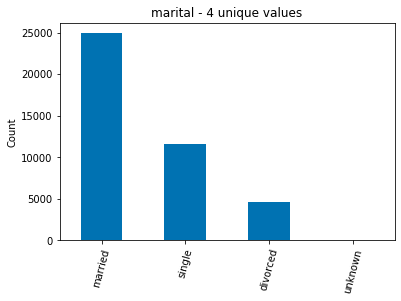

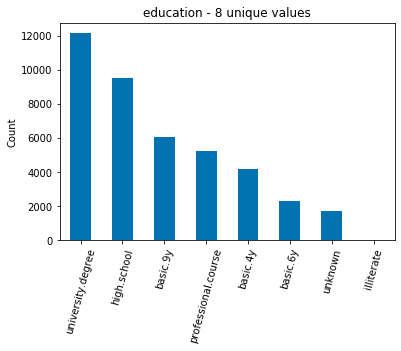

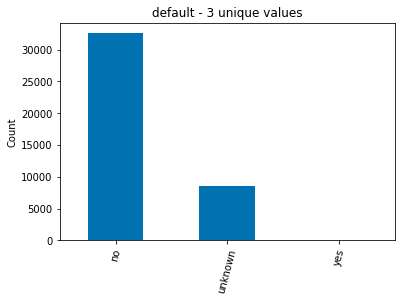

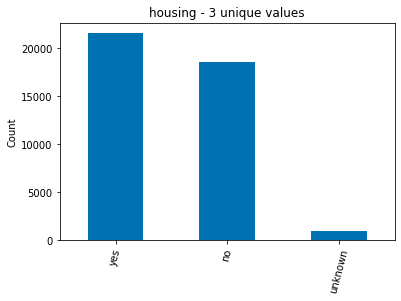

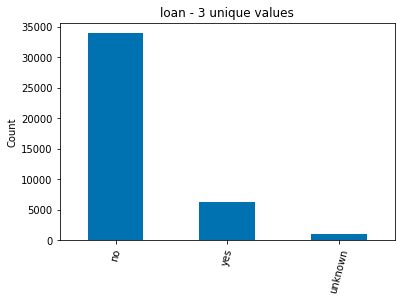

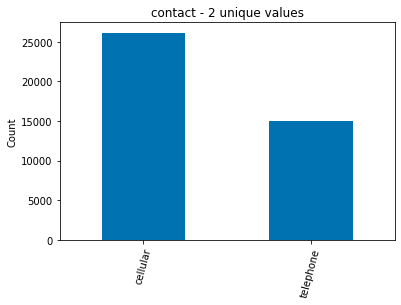

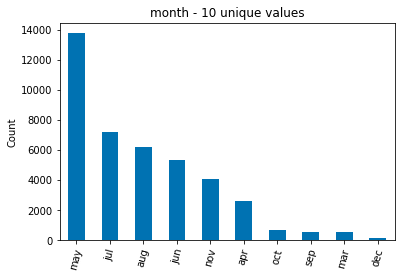

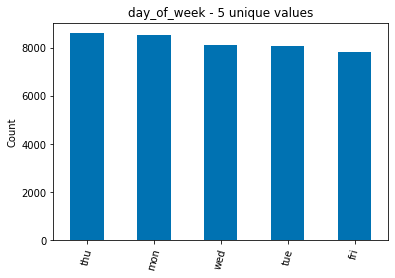

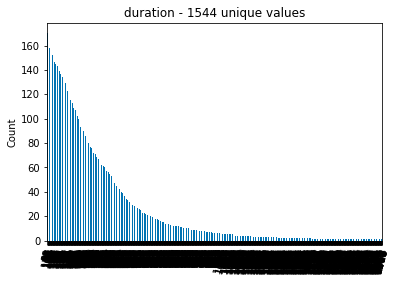

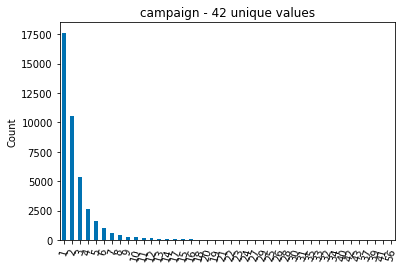

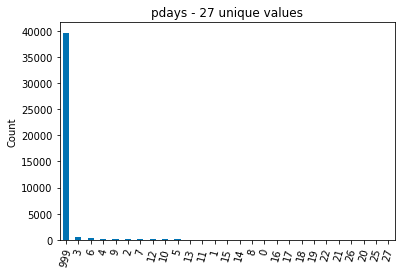

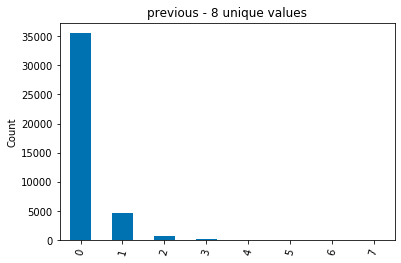

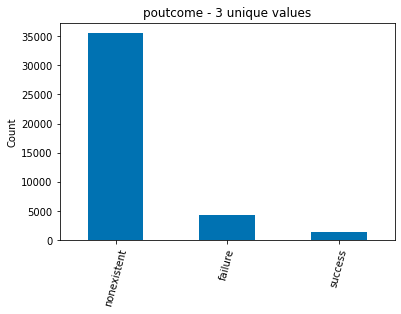

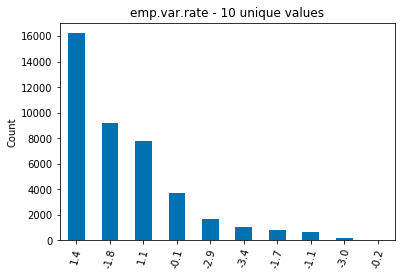

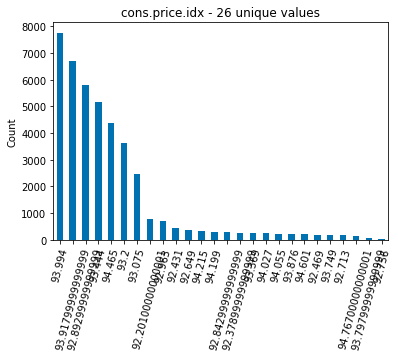

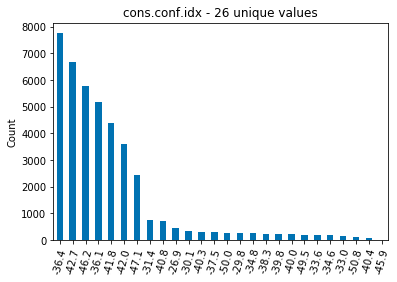

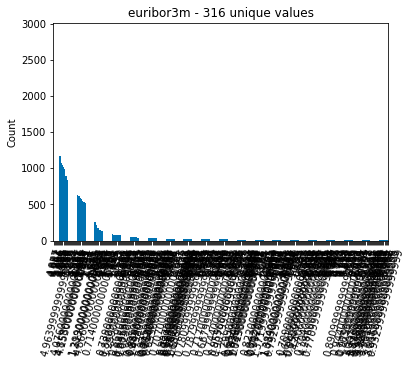

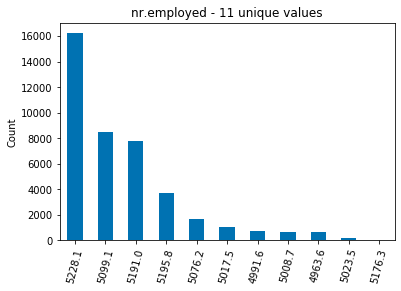

In [29]:
#plot for unique analysis
for i in df.columns:
    plt.figure()
    plt.title(f'{i} - {unique_values[i]} unique values')
    plt.ylabel('Count');
    values=pd.value_counts(df[i]).plot.bar()
    plt.xticks(rotation = 75);  

### Change the index of the dataframe as a unique column

In [30]:
# Find columns with unique values
unique_columns =[index for  index,values in unique_values.items() if values==len(df) ]
print(f'{unique_columns if unique_columns !=[] else None}')

None


In [ ]:
df.set_index('col1',inplace=True)
df.head()

### Check which column is numerical and categroical

In [31]:
interesting= pd.DataFrame(df.dtypes,columns=["Data_Type"])
interesting["First_value"]=df.siloc[0,:]
interesting["Unique_values"]=unique_values
interesting

AttributeError: 'DataFrame' object has no attribute 'siloc'

### Convert numeric to categorical feature

Sometimes categorical values are denoted as numeric (0 and 1). It is better to label them as categorical before splitting.

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
to_categorical=["previous"]
df[to_categorical]=df[to_categorical].astype(str)

### Convert string to datetime feature
It is easier to convert to datetime before splitting

In [ ]:
to_date=["col1"]
df[to_date]=df[to_date].apply(parse)

### Overview of summary based on the target variable

In [ ]:
grouped_values = df.groupby(target)
grouped_summary=grouped_values.mean()
grouped_summary

### Rename columns if needed

In [36]:
replace_columns={'emp.var.rate':'emp_var_rate',"cons.price.idx":"cons_price_idx","nr.employed":"nr_employed",'cons.conf.idx':'cons_conf_idx'}
df.rename(columns=replace_columns,inplace=True)
df.head()

y  age        job  marital    education  default housing loan    contact  \
0  no   56  housemaid  married     basic.4y       no      no   no  telephone   
1  no   57   services  married  high.school  unknown      no   no  telephone   
2  no   37   services  married  high.school       no     yes   no  telephone   
3  no   40     admin.  married     basic.6y       no      no   no  telephone   
4  no   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays previous     poutcome  \
0   may         mon       261         1    999        0  nonexistent   
1   may         mon       149         1    999        0  nonexistent   
2   may         mon       226         1    999        0  nonexistent   
3   may         mon       151         1    999        0  nonexistent   
4   may         mon       307         1    999        0  nonexistent   

   emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
0           1.1          93.994          -36.4      4.857       5191.0  
1           1.1          93.994          -36.4      4.857       5191.0  
2           1.1          93.994          -36.4      4.857       5191.0  
3           1.1          93.994          -36.4      4.857       5191.0  
4           1.1          93.994          -36.4      4.857       5191.0

### Drop the target variable from the dataframe

Since we have a target stored as a variable, it is better to seperate it from the rest of the dataframe

In [37]:
df.drop(columns=target.name,inplace=True)
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays previous     poutcome  \
0   may         mon       261         1    999        0  nonexistent   
1   may         mon       149         1    999        0  nonexistent   
2   may         mon       226         1    999        0  nonexistent   
3   may         mon       151         1    999        0  nonexistent   
4   may         mon       307         1    999        0  nonexistent   

   emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
0           1.1          93.994          -36.4      4.857       5191.0  
1           1.1          93.994          -36.4      4.857       5191.0  
2           1.1          93.994          -36.4      4.857       5191.0  
3           1.1          93.994          -36.4      4.857       5191.0  
4           1.1          93.994          -36.4      4.857       5191.0

### Get numeric and categorical features

NOTE: Categorical features will also contain timestamps as there may be a chance that it exists as a string datatype

In [38]:
df_numeric=df.select_dtypes(include=['float64', 'int64'])
df_date=df.select_dtypes(include=['datetime64'])
df_categorical=df.select_dtypes(exclude=['float64', 'int64','datetime64'])

## Categorical Data

### Remove extra white space in text columns

In [39]:
for col in df_categorical.columns:
    df_categorical[col] = df_categorical[col].str.strip()

### Bar plot of categorical features

In [40]:
df_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'previous', 'poutcome'],
      dtype='object')

In [41]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41176 non-null  object
 1   marital      41176 non-null  object
 2   education    41176 non-null  object
 3   default      41176 non-null  object
 4   housing      41176 non-null  object
 5   loan         41176 non-null  object
 6   contact      41176 non-null  object
 7   month        41176 non-null  object
 8   day_of_week  41176 non-null  object
 9   previous     41176 non-null  object
 10  poutcome     41176 non-null  object
dtypes: object(11)
memory usage: 3.8+ MB


In [42]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, order=None, verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print ('\t', column_interested)
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()
    print('\n'*2)

### Univariate analysis

job
count      41176
unique        12
top       admin.
freq       10419
Name: job, dtype: object
mode:  0    admin.
dtype: object
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


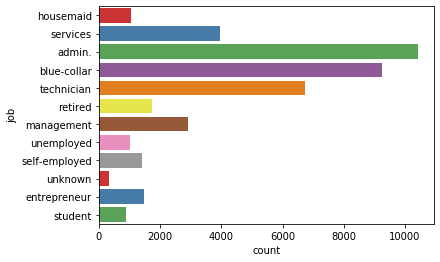




	 marital
count       41176
unique          4
top       married
freq        24921
Name: marital, dtype: object
mode:  0    married
dtype: object
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64


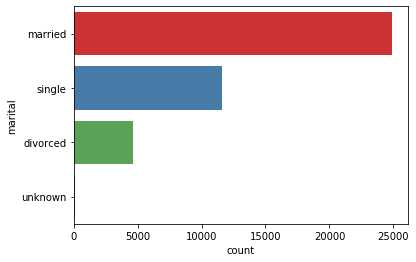




	 education
count                 41176
unique                    8
top       university.degree
freq                  12164
Name: education, dtype: object
mode:  0    university.degree
dtype: object
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64


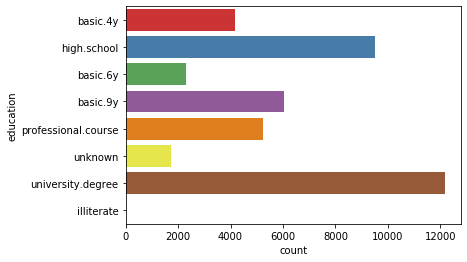




	 default
count     41176
unique        3
top          no
freq      32577
Name: default, dtype: object
mode:  0    no
dtype: object
no         32577
unknown     8596
yes            3
Name: default, dtype: int64


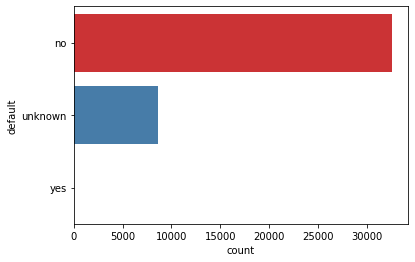




	 housing
count     41176
unique        3
top         yes
freq      21571
Name: housing, dtype: object
mode:  0    yes
dtype: object
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64


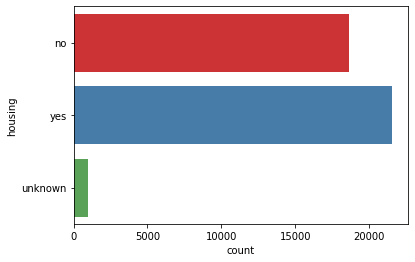




	 loan
count     41176
unique        3
top          no
freq      33938
Name: loan, dtype: object
mode:  0    no
dtype: object
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64


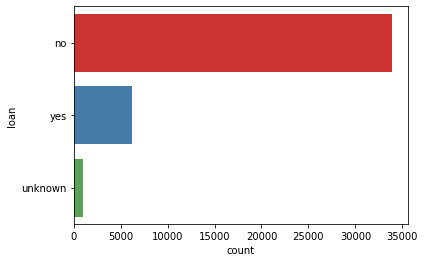




	 contact
count        41176
unique           2
top       cellular
freq         26135
Name: contact, dtype: object
mode:  0    cellular
dtype: object
cellular     26135
telephone    15041
Name: contact, dtype: int64


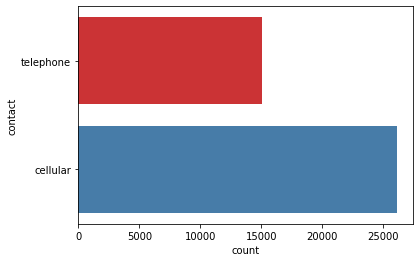




	 month
count     41176
unique       10
top         may
freq      13767
Name: month, dtype: object
mode:  0    may
dtype: object
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


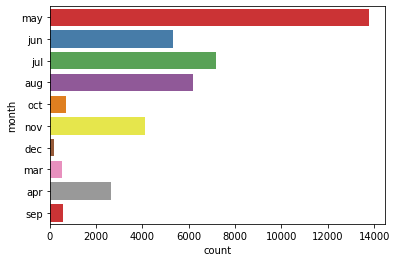




	 day_of_week
count     41176
unique        5
top         thu
freq       8618
Name: day_of_week, dtype: object
mode:  0    thu
dtype: object
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


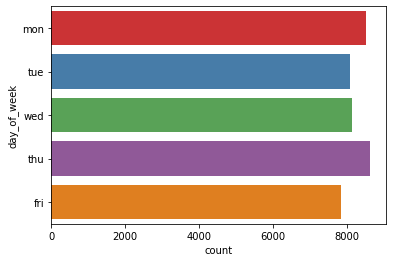




	 previous
count     41176
unique        8
top           0
freq      35551
Name: previous, dtype: object
mode:  0    0
dtype: object
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


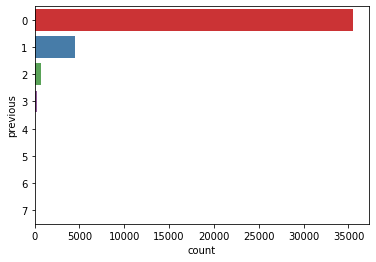




	 poutcome
count           41176
unique              3
top       nonexistent
freq            35551
Name: poutcome, dtype: object
mode:  0    nonexistent
dtype: object
nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64


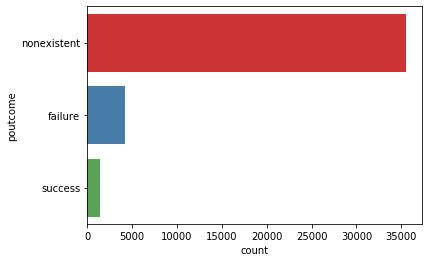

In [43]:
for col in df_categorical.columns:
    categorical_summarized(df_categorical,y=col)

### Bivariate analysis

job
count      41176
unique        12
top       admin.
freq       10419
Name: job, dtype: object
mode:  0    admin.
dtype: object
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


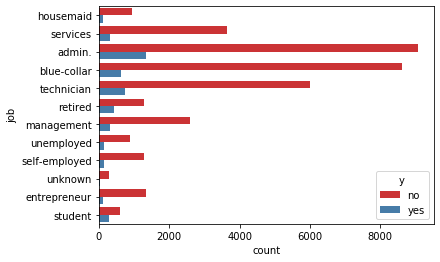




	 marital
count       41176
unique          4
top       married
freq        24921
Name: marital, dtype: object
mode:  0    married
dtype: object
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64


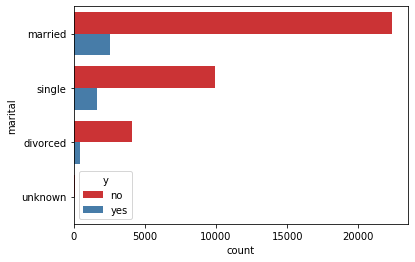




	 education
count                 41176
unique                    8
top       university.degree
freq                  12164
Name: education, dtype: object
mode:  0    university.degree
dtype: object
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64


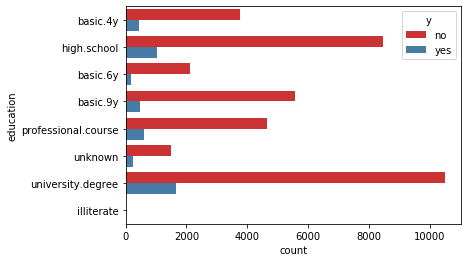




	 default
count     41176
unique        3
top          no
freq      32577
Name: default, dtype: object
mode:  0    no
dtype: object
no         32577
unknown     8596
yes            3
Name: default, dtype: int64


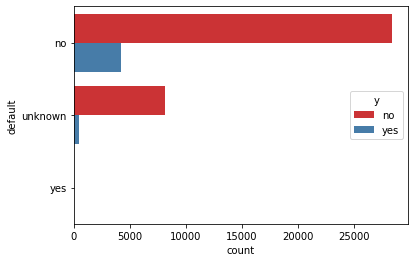




	 housing
count     41176
unique        3
top         yes
freq      21571
Name: housing, dtype: object
mode:  0    yes
dtype: object
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64


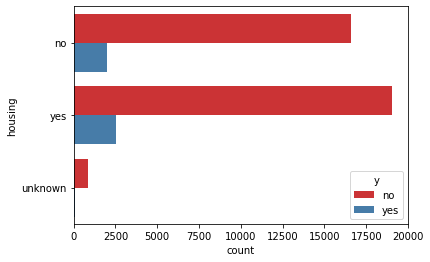




	 loan
count     41176
unique        3
top          no
freq      33938
Name: loan, dtype: object
mode:  0    no
dtype: object
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64


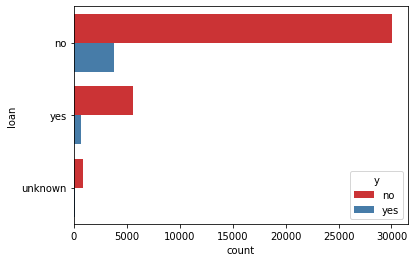




	 contact
count        41176
unique           2
top       cellular
freq         26135
Name: contact, dtype: object
mode:  0    cellular
dtype: object
cellular     26135
telephone    15041
Name: contact, dtype: int64


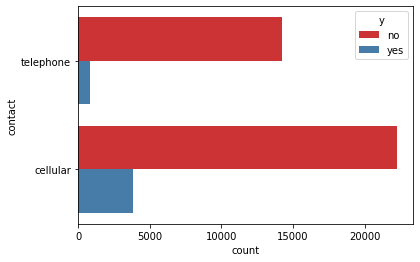




	 month
count     41176
unique       10
top         may
freq      13767
Name: month, dtype: object
mode:  0    may
dtype: object
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


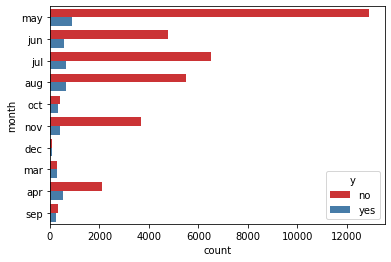




	 day_of_week
count     41176
unique        5
top         thu
freq       8618
Name: day_of_week, dtype: object
mode:  0    thu
dtype: object
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


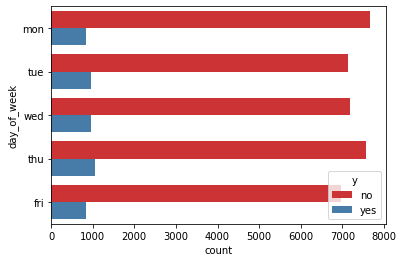




	 previous
count     41176
unique        8
top           0
freq      35551
Name: previous, dtype: object
mode:  0    0
dtype: object
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


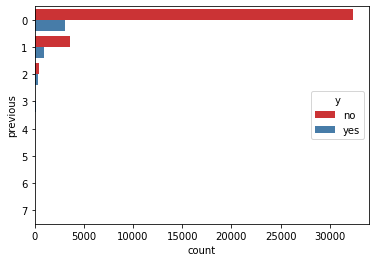




	 poutcome
count           41176
unique              3
top       nonexistent
freq            35551
Name: poutcome, dtype: object
mode:  0    nonexistent
dtype: object
nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64


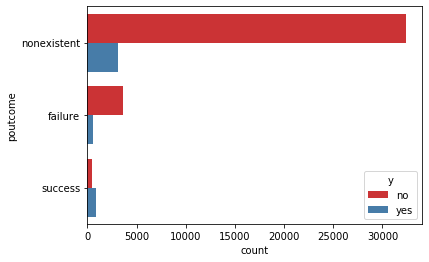

In [44]:
for col in df_categorical.columns:
    categorical_summarized(df_categorical,y=col,hue=target)

### Categorical Data Imputation

#### <span style="color:blue">**(1) Impute missing categorical values with mode**</span> 

In [ ]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
non_numeric_cols = df_categorical.columns.values

for col in non_numeric_cols:
    missing = df_categorical[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df_categorical['{}_ismissing'.format(col)] = missing
        
        top = df_categorical[col].describe()['top'] # impute with the most frequent value.
        df_categorical[col] = df_categorical[col].fillna(top)

## Chi square analysis

Tests for independence of categorical variables. Requires all categorical variables to be **label encoded** before analysis

In [45]:
chi_square = df_categorical.apply(LabelEncoder().fit_transform)
chi_scores = chi2(chi_square,target)
chi_scores

(array([9.10606856e+01, 2.78444777e+01, 1.67446537e+02, 3.21891101e+02,
        5.03001538e+00, 1.59481628e+00, 5.47778461e+02, 1.91780661e+00,
        1.02336274e+01, 3.08971421e+03, 9.82633299e+01]),
 array([1.39332695e-021, 1.31468774e-007, 2.67234520e-038, 5.61024919e-072,
        2.49116773e-002, 2.06639369e-001, 3.83060036e-121, 1.66098660e-001,
        1.37903192e-003, 0.00000000e+000, 3.66286433e-023]))

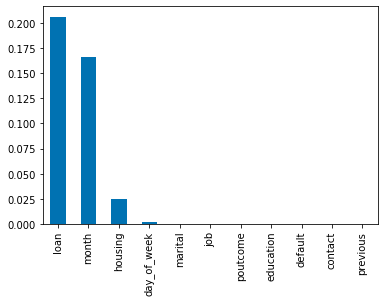

In [46]:
p_values = pd.Series(chi_scores[1],index = chi_square.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

### Encoding categorical data
<span style="color:red">**Choose relevant features and encoding methods**</span>

In [47]:
df_categorical.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week previous     poutcome  
0         mon        0  nonexistent  
1         mon        0  nonexistent  
2         mon        0  nonexistent  
3         mon        0  nonexistent  
4         mon        0  nonexistent

#### <span style="color:blue">** (1) Label Encoder **</span> 

In [48]:
label_encoded_variables=['previous']
le = LabelEncoder()
label_encoded=df_categorical[label_encoded_variables].apply(lambda x: le.fit_transform(x))
label_encoded.columns=[label+"_label_encoded" for label in label_encoded_variables]

# Convert to Integer values

In [49]:
df_categorical.drop(labels=label_encoded_variables, axis=1,inplace=True)
df_categorical[label_encoded.columns] = label_encoded
df_categorical.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome  previous_label_encoded  
0         mon  nonexistent                       0  
1         mon  nonexistent                       0  
2         mon  nonexistent                       0  
3         mon  nonexistent                       0  
4         mon  nonexistent                       0

#### <span style="color:blue">** (2) Label Encoder with Weights  **</span> 

In [50]:
num_encoded_variables=['education','housing','loan','default','month','day_of_week']
num_encode = {'education'  : {'illiterate':0, 'unknown':0, 'basic.4y':1,'basic.6y':2, 'basic.9y':3, 'high.school':4,'professional.course':5, 'university.degree':6},
              'housing'  : {'yes':1, 'no':0, 'unknown':0},
              'loan'  : {'yes':1, 'no':0, 'unknown':0},
              'default'  : {'yes':1, 'no':0, 'unknown':0},

              'month'  : {'mar':1, 'apr':2, 'may':3, 'jun':4, 'jul':5, 'aug':6, 'sep':7, 'oct':8, 'nov':9, 'dec':10},
              'day_of_week'  : {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}       
              
              
              }  

In [51]:
label_encoded=df_categorical[num_encoded_variables].replace(num_encode) 
label_encoded.columns=[label+"_label_encoded" for label in num_encoded_variables] 
label_encoded.head()

education_label_encoded  housing_label_encoded  loan_label_encoded  \
0                        1                      0                   0   
1                        4                      0                   0   
2                        4                      1                   0   
3                        2                      0                   0   
4                        4                      0                   1   

   default_label_encoded  month_label_encoded  day_of_week_label_encoded  
0                      0                    3                          1  
1                      0                    3                          1  
2                      0                    3                          1  
3                      0                    3                          1  
4                      0                    3                          1

In [52]:
df_categorical.drop(labels=num_encoded_variables, axis=1,inplace=True)
df_categorical[label_encoded.columns] = label_encoded
df_categorical.head()

job  marital    contact     poutcome  previous_label_encoded  \
0  housemaid  married  telephone  nonexistent                       0   
1   services  married  telephone  nonexistent                       0   
2   services  married  telephone  nonexistent                       0   
3     admin.  married  telephone  nonexistent                       0   
4   services  married  telephone  nonexistent                       0   

   education_label_encoded  housing_label_encoded  loan_label_encoded  \
0                        1                      0                   0   
1                        4                      0                   0   
2                        4                      1                   0   
3                        2                      0                   0   
4                        4                      0                   1   

   default_label_encoded  month_label_encoded  day_of_week_label_encoded  
0                      0                    3                          1  
1                      0                    3                          1  
2                      0                    3                          1  
3                      0                    3                          1  
4                      0                    3                          1

#### <span style="color:blue">** (3) One Hot Encoder  **</span> 

In [54]:
one_hot_variables=['job','marital','contact','poutcome']
df_categorical=pd.get_dummies(data=df_categorical, columns=one_hot_variables,dummy_na=True)
df_categorical.head()

previous_label_encoded  education_label_encoded  housing_label_encoded  \
0                       0                        1                      0   
1                       0                        4                      0   
2                       0                        4                      1   
3                       0                        2                      0   
4                       0                        4                      0   

   loan_label_encoded  default_label_encoded  month_label_encoded  \
0                   0                      0                    3   
1                   0                      0                    3   
2                   0                      0                    3   
3                   0                      0                    3   
4                   1                      0                    3   

   day_of_week_label_encoded  job_admin.  job_blue-collar  job_entrepreneur  \
0                          1           0                0                 0   
1                          1           0                0                 0   
2                          1           0                0                 0   
3                          1           1                0                 0   
4                          1           0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              1               0            0                  0   
1              0               0            0                  0   
2              0               0            0                  0   
3              0               0            0                  0   
4              0               0            0                  0   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0             0            0               0               0            0   
1             1            0               0               0            0   
2             1            0               0               0            0   
3             0            0               0               0            0   
4             1            0               0               0            0   

   job_nan  marital_divorced  marital_married  marital_single  \
0        0                 0                1               0   
1        0                 0                1               0   
2        0                 0                1               0   
3        0                 0                1               0   
4        0                 0                1               0   

   marital_unknown  marital_nan  contact_cellular  contact_telephone  \
0                0            0                 0                  1   
1                0            0                 0                  1   
2                0            0                 0                  1   
3                0            0                 0                  1   
4                0            0                 0                  1   

   contact_nan  poutcome_failure  poutcome_nonexistent  poutcome_success  \
0            0                 0                     1                 0   
1            0                 0                     1                 0   
2            0                 0                     1                 0   
3            0                 0                     1                 0   
4            0                 0                     1                 0   

   poutcome_nan  
0             0  
1             0  
2             0  
3             0  
4             0

## Finalized Categorical columns

In [55]:
df_categorical.head()

previous_label_encoded  education_label_encoded  housing_label_encoded  \
0                       0                        1                      0   
1                       0                        4                      0   
2                       0                        4                      1   
3                       0                        2                      0   
4                       0                        4                      0   

   loan_label_encoded  default_label_encoded  month_label_encoded  \
0                   0                      0                    3   
1                   0                      0                    3   
2                   0                      0                    3   
3                   0                      0                    3   
4                   1                      0                    3   

   day_of_week_label_encoded  job_admin.  job_blue-collar  job_entrepreneur  \
0                          1           0                0                 0   
1                          1           0                0                 0   
2                          1           0                0                 0   
3                          1           1                0                 0   
4                          1           0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              1               0            0                  0   
1              0               0            0                  0   
2              0               0            0                  0   
3              0               0            0                  0   
4              0               0            0                  0   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0             0            0               0               0            0   
1             1            0               0               0            0   
2             1            0               0               0            0   
3             0            0               0               0            0   
4             1            0               0               0            0   

   job_nan  marital_divorced  marital_married  marital_single  \
0        0                 0                1               0   
1        0                 0                1               0   
2        0                 0                1               0   
3        0                 0                1               0   
4        0                 0                1               0   

   marital_unknown  marital_nan  contact_cellular  contact_telephone  \
0                0            0                 0                  1   
1                0            0                 0                  1   
2                0            0                 0                  1   
3                0            0                 0                  1   
4                0            0                 0                  1   

   contact_nan  poutcome_failure  poutcome_nonexistent  poutcome_success  \
0            0                 0                     1                 0   
1            0                 0                     1                 0   
2            0                 0                     1                 0   
3            0                 0                     1                 0   
4            0                 0                     1                 0   

   poutcome_nan  
0             0  
1             0  
2             0  
3             0  
4             0

## Date-Time data 

<span style="color:red">**Make sure that the data related to time is a relevant feature (Classification models cannot use datetime variables)**</span>


<span style="color:green">**Needs more fine tuning**</span>

#### Convert timestamp(from string to datetime format)


In [ ]:
df_date['timestamp']=pd.to_datetime(df_categorical['col1'], format='%Y-%m-%d %H:%M:%S.%f'))

In [ ]:
df_date

In [ ]:
x_values = [datetime.strptime(d,"%m/%d/%Y").date() for d in df_date['col1']]
y_values = col1

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)

#### Pull Day, month year if the timestamp is a string

In [ ]:
df_date['date'] = pd.to_datetime(df_date['timestamp'], format='%Y-%m-%d')
df_date['year'] = df_date['date'].dt.year
df_date['month'] = df_date['date'].dt.month
df_date['day'] = df_date['date'].dt.day
df_date['weekday'] = df_date['timestamp_dt'].dt.weekday

In [ ]:
df_date['hour'] = df_date['date'].dt.hour
df_date['minute'] = df_date['date'].dt.minute

#### Show Days Of The Week

In [ ]:
df_date['weekday'] = df_categorical.date.weekday()

#### Difference between two dates

In [ ]:
df_date['date_difference']=abs((d2 - d1).days)

#### Drop the orginal timestamp columns

In [ ]:
del(df_date['col1'])

## Finalized Date columns

In [56]:
df_date.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

## Numeric data

### Univariate analysis

### Histogram of numeric features

In [77]:
df_numeric.head()

age  duration  campaign  pdays  emp_var_rate  cons_price_idx  \
0   56       261         1    999           1.1          93.994   
1   57       149         1    999           1.1          93.994   
2   37       226         1    999           1.1          93.994   
3   40       151         1    999           1.1          93.994   
4   56       307         1    999           1.1          93.994   

   cons_conf_idx  euribor3m  nr_employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0

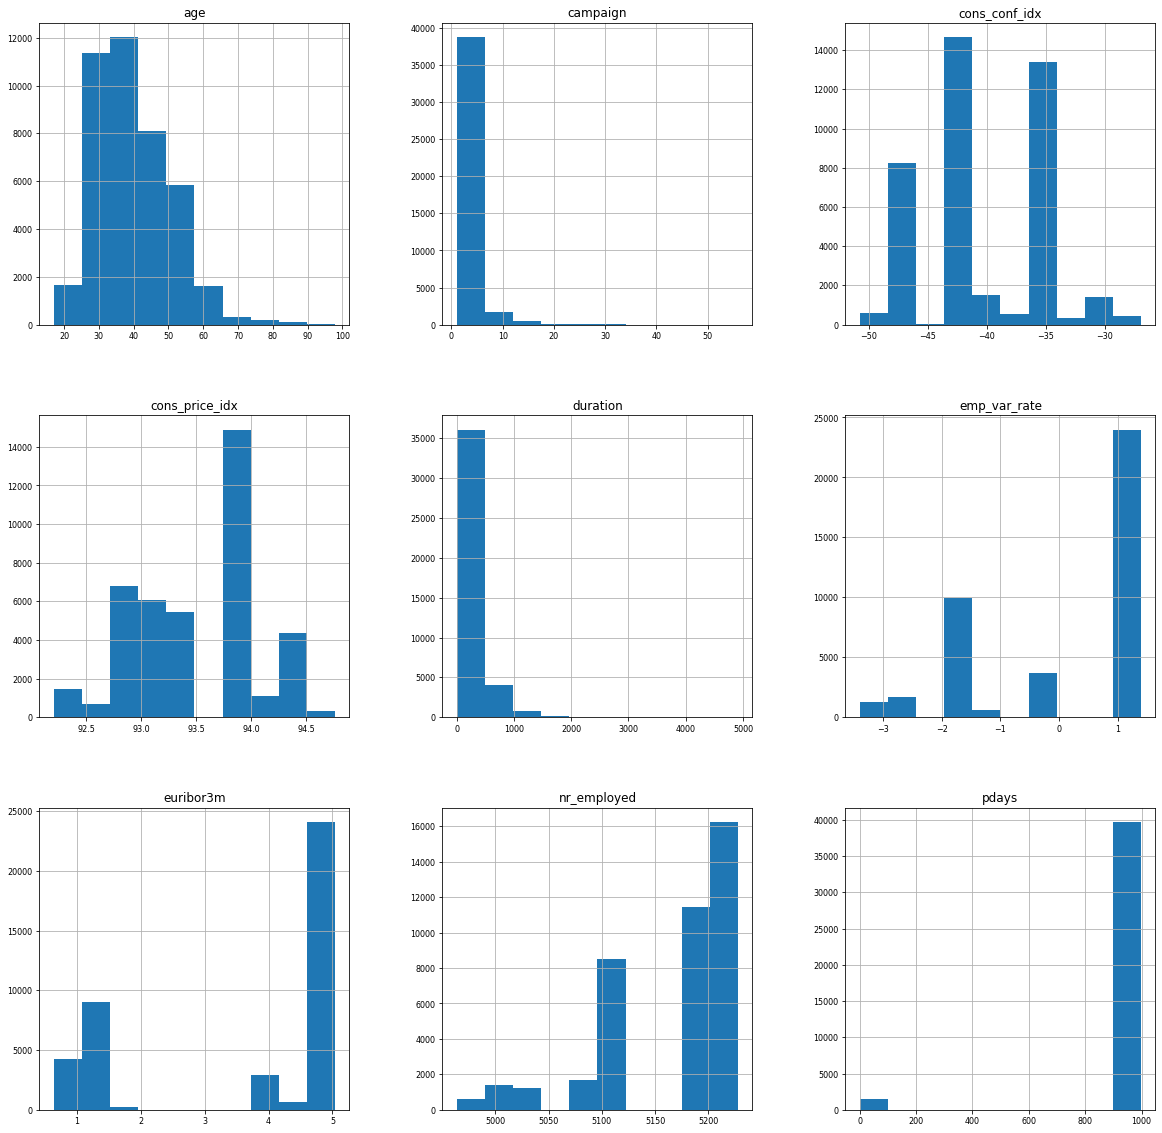

In [130]:
df_numeric.hist(figsize=(20, 20), bins=10, xlabelsize=8, ylabelsize=8);

### General Statistical Insights

In [59]:
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, order=None, verbose=True):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the violin plot of the distribution
    '''
    series = dataframe[y]
    print ('\t', y)
    print(series.describe())
    print('mode: ', series.mode())
    print('Unique values: ', series.unique().size)
    if verbose:
        print('\n'*2)
        print(series.value_counts())
    
    sns.violinplot(x=x, y=y, hue=hue, data=dataframe,
                palette=palette, order=order, ax=ax)
    

    plt.show()
    print('\n'+'#'*80+'\n')

### Univariate numeric analysis

age
count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
mode:  0    31
dtype: int64
Unique values:  78


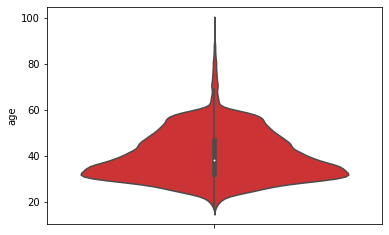


################################################################################

	 duration
count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
mode:  0    85
1    90
dtype: int64
Unique values:  1544


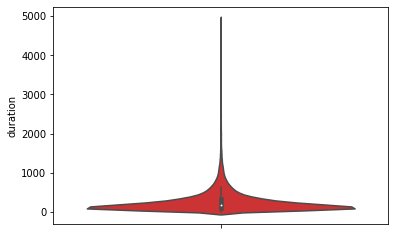


################################################################################

	 campaign
count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
mode:  0    1
dtype: int64
Unique values:  42


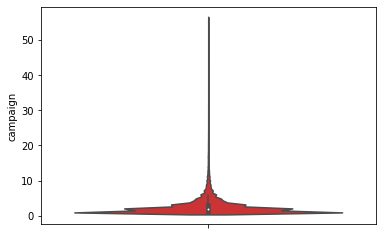


################################################################################

	 pdays
count    41176.000000
mean       962.464810
std        186.937102
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64
mode:  0    999
dtype: int64
Unique values:  27


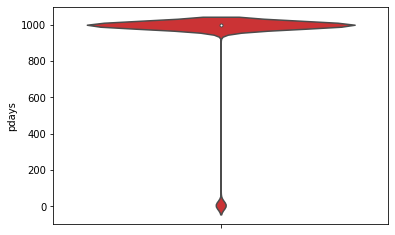


################################################################################

	 emp_var_rate
count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp_var_rate, dtype: float64
mode:  0    1.4
dtype: float64
Unique values:  10


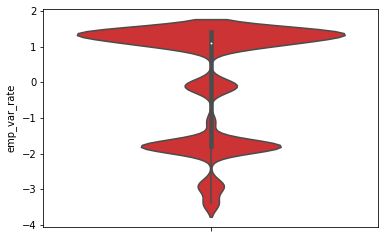


################################################################################

	 cons_price_idx
count    41176.000000
mean        93.575720
std          0.578839
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons_price_idx, dtype: float64
mode:  0    93.994
dtype: float64
Unique values:  26


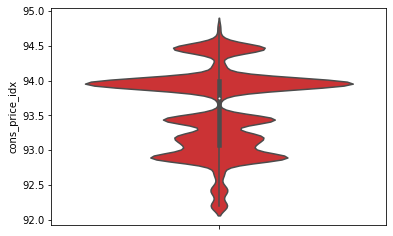


################################################################################

	 cons_conf_idx
count    41176.000000
mean       -40.502863
std          4.627860
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons_conf_idx, dtype: float64
mode:  0   -36.4
dtype: float64
Unique values:  26


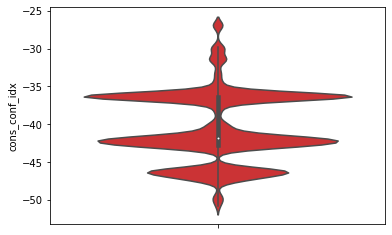


################################################################################

	 euribor3m
count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64
mode:  0    4.857
dtype: float64
Unique values:  316


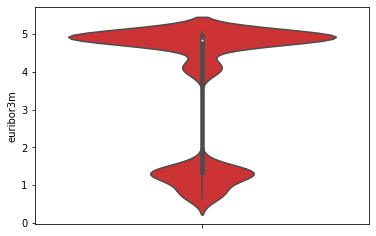


################################################################################

	 nr_employed
count    41176.000000
mean      5167.034870
std         72.251364
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr_employed, dtype: float64
mode:  0    5228.1
dtype: float64
Unique values:  11


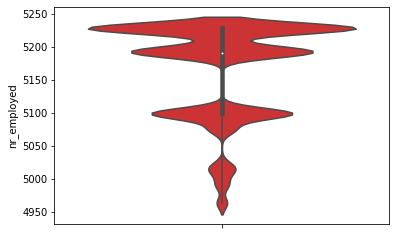


################################################################################



In [65]:
for col in df_numeric.columns:
    quantitative_summarized(df_numeric,y=col, verbose=False)

### Bivariate numeric analysis

age
count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
mode:  0    31
dtype: int64
Unique values:  78


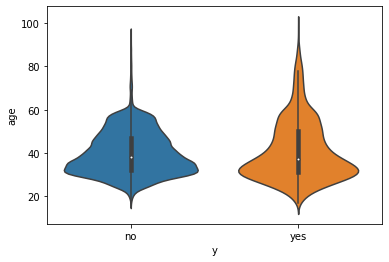


################################################################################

	 duration
count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
mode:  0    85
1    90
dtype: int64
Unique values:  1544


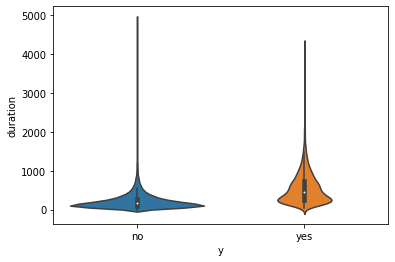


################################################################################

	 campaign
count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
mode:  0    1
dtype: int64
Unique values:  42


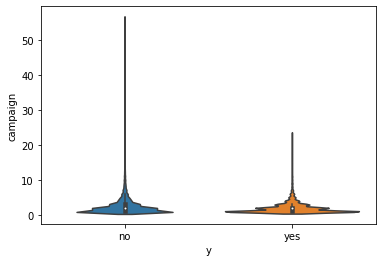


################################################################################

	 pdays
count    41176.000000
mean       962.464810
std        186.937102
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64
mode:  0    999
dtype: int64
Unique values:  27


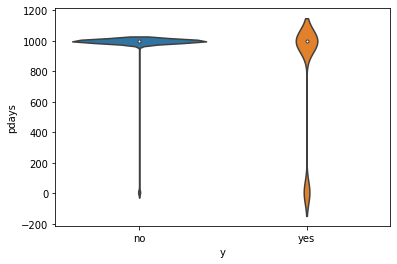


################################################################################

	 emp_var_rate
count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp_var_rate, dtype: float64
mode:  0    1.4
dtype: float64
Unique values:  10


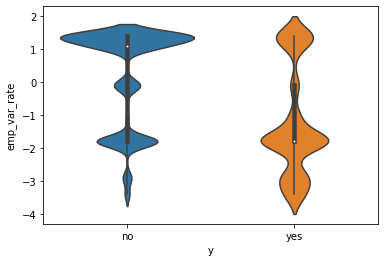


################################################################################

	 cons_price_idx
count    41176.000000
mean        93.575720
std          0.578839
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons_price_idx, dtype: float64
mode:  0    93.994
dtype: float64
Unique values:  26


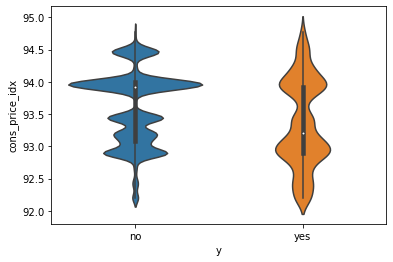


################################################################################

	 cons_conf_idx
count    41176.000000
mean       -40.502863
std          4.627860
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons_conf_idx, dtype: float64
mode:  0   -36.4
dtype: float64
Unique values:  26


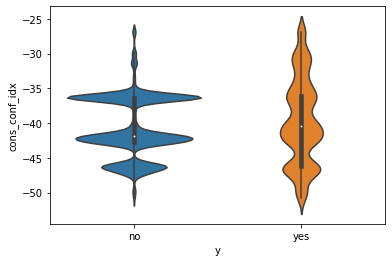


################################################################################

	 euribor3m
count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64
mode:  0    4.857
dtype: float64
Unique values:  316


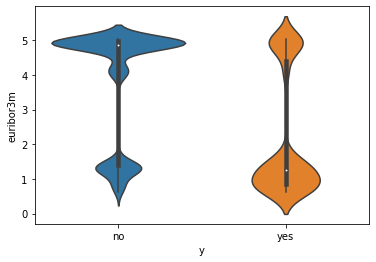


################################################################################

	 nr_employed
count    41176.000000
mean      5167.034870
std         72.251364
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr_employed, dtype: float64
mode:  0    5228.1
dtype: float64
Unique values:  11


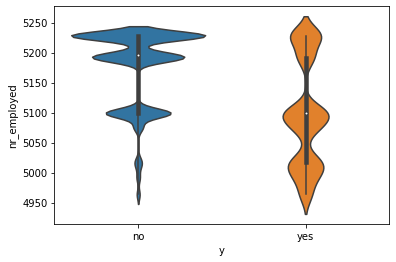


################################################################################



In [66]:
for col in df_numeric.columns:
    quantitative_summarized(dataframe= df_numeric, y = col, palette=c_palette, x = target, verbose=False)

### Multivariate numeric analysis

Use to see which 2 columns that sould be analyzed based on target column

age
count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
mode:  0    31
dtype: int64
Unique values:  78


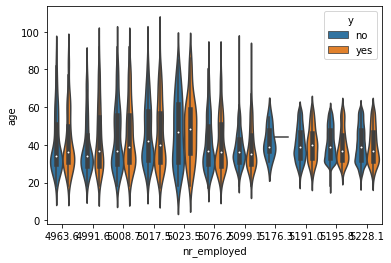


################################################################################



In [77]:
quantitative_summarized(dataframe= df_numeric, y = 'age', x = 'nr_employed', hue = target, palette=c_palette3, verbose=False)

### Binning numeric columns

Either by equal range/width (cut) or by equal frequencies(qcut)

In [57]:
#If based on equal width, Use Sturge’s Rule to estimate the number of bins

sturge_value=1 + 3.322 *log(df_numeric.size)
print ("Optimal bins:", ceil(sturge_value))


Optimal bins: 44


In [64]:
#Shows estimation
pd.cut(df_numeric['age'],44).value_counts()

(31.727, 33.568]    3678
(29.886, 31.727]    3661
(33.568, 35.409]    3503
(35.409, 37.25]     3254
(37.25, 39.091]     2837
(40.932, 42.773]    2419
(44.614, 46.455]    2132
(42.773, 44.614]    2066
(46.455, 48.295]    1906
(26.205, 28.045]    1851
(48.295, 50.136]    1714
(51.977, 53.818]    1512
(28.045, 29.886]    1453
(55.659, 57.5]      1350
(53.818, 55.659]    1331
(24.364, 26.205]    1296
(39.091, 40.932]    1161
(57.5, 59.341]      1039
(50.136, 51.977]     754
(22.523, 24.364]     688
(59.341, 61.182]     356
(20.682, 22.523]     239
(61.182, 63.023]     117
(18.841, 20.682]     107
(64.864, 66.705]     101
(70.386, 72.227]      86
(68.545, 70.386]      81
(72.227, 74.068]      66
(66.705, 68.545]      59
(63.023, 64.864]      57
(75.909, 77.75]       54
(79.591, 81.432]      51
(77.75, 79.591]       41
(81.432, 83.273]      34
(16.919, 18.841]      33
(74.068, 75.909]      24
(86.955, 88.795]      23
(83.273, 85.114]      22
(85.114, 86.955]       8
(90.636, 92.477]       6


In [65]:
#Model friendly version - Labeled within binned category
df_numeric_binned= pd.cut(df_numeric['age'],44,labels=False)


#Side-by-side comparison
pd.DataFrame({'age':df_numeric['age'], 'age_binned':df_numeric_binned}).head()

age  age_binned
0   56          21
1   57          21
2   37          10
3   40          12
4   56          21

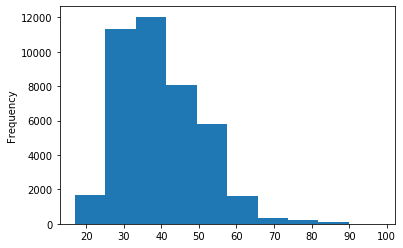

In [66]:
df_numeric['age'].plot(kind='hist')

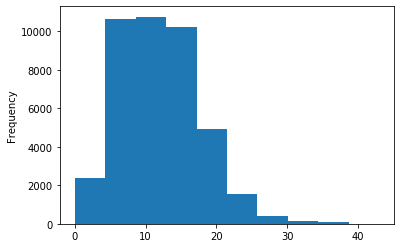

In [67]:
df_numeric_binned.plot(kind='hist')

In [68]:
#append to the original dataframe

binned_name=df_numeric_binned.name
df_numeric.drop(labels=binned_name, axis=1,inplace = True)
df_numeric= pd.concat([df_numeric, df_numeric_binned], axis=1)
df_numeric.head()

duration  campaign  pdays  emp_var_rate  cons_price_idx  cons_conf_idx  \
0       261         1    999           1.1          93.994          -36.4   
1       149         1    999           1.1          93.994          -36.4   
2       226         1    999           1.1          93.994          -36.4   
3       151         1    999           1.1          93.994          -36.4   
4       307         1    999           1.1          93.994          -36.4   

   euribor3m  nr_employed  age  
0      4.857       5191.0   21  
1      4.857       5191.0   21  
2      4.857       5191.0   10  
3      4.857       5191.0   12  
4      4.857       5191.0   21

### Handling outliers 

In [69]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame([Q1,Q3,IQR])

duration  campaign  pdays  emp_var_rate  cons_price_idx  \
0.25          102.0       1.0  999.0          -1.8          93.075   
0.75          319.0       3.0  999.0           1.4          93.994   
Unnamed 0     217.0       2.0    0.0           3.2           0.919   

           cons_conf_idx  euribor3m  nr_employed   age  
0.25               -42.7      1.344       5099.1   8.0  
0.75               -36.4      4.961       5228.1  16.0  
Unnamed 0            6.3      3.617        129.0   8.0

In [72]:
# Shows all outliers
df_numeric_outliers = df_numeric[((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_numeric_outliers.head()
print (df_numeric_outliers.head())
print ('\n',df_numeric_outliers.shape)


duration  campaign  pdays  emp_var_rate  cons_price_idx  cons_conf_idx  \
37      1666         1    999           1.1          93.994          -36.4   
57       787         1    999           1.1          93.994          -36.4   
61       812         1    999           1.1          93.994          -36.4   
75      1575         1    999           1.1          93.994          -36.4   
83      1042         1    999           1.1          93.994          -36.4   

    euribor3m  nr_employed  age  
37      4.857       5191.0   19  
57      4.857       5191.0   15  
61      4.857       5191.0   18  
75      4.857       5191.0   13  
83      4.857       5191.0   17  

 (7187, 9)


In [74]:
#This is present to remove any of the outliers 
df_numeric = df_numeric[~df_numeric.index.isin(df_numeric_outliers.index)]
df_numeric.shape

(33989, 9)

### Dataframe after eliminating outliers

In [75]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33989 entries, 0 to 41186
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration        33989 non-null  int64  
 1   campaign        33989 non-null  int64  
 2   pdays           33989 non-null  int64  
 3   emp_var_rate    33989 non-null  float64
 4   cons_price_idx  33989 non-null  float64
 5   cons_conf_idx   33989 non-null  float64
 6   euribor3m       33989 non-null  float64
 7   nr_employed     33989 non-null  float64
 8   age             33989 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 2.6 MB


In [76]:
df_numeric.describe()

duration      campaign    pdays  emp_var_rate  cons_price_idx  \
count  33989.000000  33989.000000  33989.0  33989.000000    33989.000000   
mean     204.751096      2.059872    999.0      0.173565       93.584174   
std      139.840100      1.292640      0.0      1.501887        0.558722   
min        0.000000      1.000000    999.0     -3.400000       92.201000   
25%      100.000000      1.000000    999.0     -1.800000       93.075000   
50%      168.000000      2.000000    999.0      1.100000       93.444000   
75%      277.000000      3.000000    999.0      1.400000       93.994000   
max      644.000000      6.000000    999.0      1.400000       94.767000   

       cons_conf_idx     euribor3m   nr_employed           age  
count   33989.000000  33989.000000  33989.000000  33989.000000  
mean      -40.720766      3.729595   5173.002654     11.795228  
std         4.349505      1.669127     65.705896      5.216482  
min       -50.800000      0.634000   4963.600000      0.000000  
25%       -42.700000      1.405000   5099.100000      8.000000  
50%       -41.800000      4.857000   5191.000000     11.000000  
75%       -36.400000      4.961000   5228.100000     16.000000  
max       -29.800000      5.045000   5228.100000     28.000000

### Skewedness and Kurtosis distributions

### Skewedness

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.

### Kurtosis 

* A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
* A distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
* A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

In [77]:
df_numeric_orientation = pd.DataFrame({"Skewedness":df_numeric.skew(),"Kurtosis":df_numeric.kurt()})
df_numeric_orientation

Skewedness  Kurtosis
duration          1.049902  0.534613
campaign          1.283339  0.994966
pdays             0.000000  0.000000
emp_var_rate     -0.785588 -0.996167
cons_price_idx   -0.179041 -0.855419
cons_conf_idx     0.109367 -0.865287
euribor3m        -0.828321 -1.217787
nr_employed      -1.107783  0.288743
age               0.433705 -0.583824

### Reduce memory load by converting to 32-bits

<span style="color:red">**Confirm that the data values do not matter when downsizing**</span>

In [ ]:
# Change the dtypes (int64 -> int32)
df_numeric[['col1']] = df_numeric[['col1']].astype('int32')

# Change the dtypes (float64 -> float32)
df_numeric[['col1']] = df_numeric[['col1']].astype('float32')

### Find quantiles for each numeric value 

In [ ]:
quantile_check=df_numeric.quantile([.1, .25, .5, .75], axis = 0)
quantile_check

### Normalize Numeric features

#### MinMax Scaler

In [ ]:
cols=['col1']
scaled_variables = df_numeric[cols].values.astype(float)
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(scaled_variables)
min_max_scaled[:5]

In [ ]:
bc_cols = [f'min_max_{c}' for c in cols]
df_numeric=pd.concat([df_numeric, pd.DataFrame(min_max_scaled, columns=bc_cols)], axis='columns')
ds.head()

In [ ]:
#Original Visualization
df_numeric[cols].hist(layout=(2, 6), figsize=(15, 4));

In [ ]:
#Min_max transformed
df_numeric[bc_cols].hist(layout=(2, 6), figsize=(15, 4), color='orange', alpha=.5);

In [ ]:
#Choose to drop the original
df_numeric.drop(['col1'], axis=1, inplace=True) 

#### Yeo-Johnson transform


In [ ]:
cols=['col1']
scaled_variables = df_numeric[cols].values.astype(float)
yeo_johnson_scaler = PowerTransformer(method='yeo-johnson')
yeo_scaled = yeo_johnson_scaler.fit_transform(scaled_variables)
yeo_scaled[:5]

In [ ]:
bc_cols = [f'yeo_johnson_{c}' for c in cols]
df_numeric=pd.concat([df_numeric, pd.DataFrame(yeo_scaled, columns=bc_cols)], axis='columns')
ds.head()  

In [ ]:
#Original Visualization
df_numeric[cols].hist(layout=(2, 6), figsize=(15, 4));

In [ ]:
#Yeo-Johnsontransformed
df_numeric[bc_cols].hist(layout=(2, 6), figsize=(15, 4), color='orange', alpha=.5);

In [ ]:
#Choose to drop the original
df_numeric.drop(['col1'], axis=1, inplace=True) 

### Impute all missing numeric data with Median

In [ ]:
# impute the missing values and create the missing value indicator variables for each numeric column.
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print(f'imputing missing values for: {col} - Missing {num_missing} values')

        med = df_numeric[col].median()
        df_numeric[col] = df_numeric[col].fillna(med)

print("All collumns checked") 

#### <span style="color:blue">**(2) Using SimpleImputer**</span> 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_numeric = imputer.fit_transform(df_numeric)

#### <span style="color:blue">**(3) Using KNNImputer**</span> 

#### <span style="color:red">**The data needs to be normalized beforehand (transformations are done prior)**</span> 

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_numeric = imputer.fit_transform(df_numeric)

#### DataFrame transformations

<span style="color:red">**Make sure the relevant columns are transformed accordingly**</span>

In [ ]:
#Create a new colum based on the sum of two values
df_numeric['Total_col'] = df_numeric['col1'] + df_numeric['col2']

### Check if the target variable needs to be encoded

In [69]:
target.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [70]:
le = LabelEncoder()
target = le.fit_transform(target)
target[:5]

array([0, 0, 0, 0, 0])

## Finalized Numeric columns

In [58]:
df_numeric.head()

age  duration  campaign  pdays  emp_var_rate  cons_price_idx  \
0   56       261         1    999           1.1          93.994   
1   57       149         1    999           1.1          93.994   
2   37       226         1    999           1.1          93.994   
3   40       151         1    999           1.1          93.994   
4   56       307         1    999           1.1          93.994   

   cons_conf_idx  euribor3m  nr_employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0

### Combine all the features

In [72]:
df_target= pd.DataFrame(target.astype(int),columns=[target_name])
df_target.head()

y
0  0
1  0
2  0
3  0
4  0

In [73]:
df_combined= pd.concat([df_numeric, df_categorical,df_date,df_target], axis=1)

In [76]:
df_combined.head()

age  duration  campaign  pdays  emp_var_rate  cons_price_idx  \
0  56.0     261.0       1.0  999.0           1.1          93.994   
1  57.0     149.0       1.0  999.0           1.1          93.994   
2  37.0     226.0       1.0  999.0           1.1          93.994   
3  40.0     151.0       1.0  999.0           1.1          93.994   
4  56.0     307.0       1.0  999.0           1.1          93.994   

   cons_conf_idx  euribor3m  nr_employed  previous_label_encoded  \
0          -36.4      4.857       5191.0                     0.0   
1          -36.4      4.857       5191.0                     0.0   
2          -36.4      4.857       5191.0                     0.0   
3          -36.4      4.857       5191.0                     0.0   
4          -36.4      4.857       5191.0                     0.0   

   education_label_encoded  housing_label_encoded  loan_label_encoded  \
0                      1.0                    0.0                 0.0   
1                      4.0                    0.0                 0.0   
2                      4.0                    1.0                 0.0   
3                      2.0                    0.0                 0.0   
4                      4.0                    0.0                 1.0   

   default_label_encoded  month_label_encoded  day_of_week_label_encoded  \
0                    0.0                  3.0                        1.0   
1                    0.0                  3.0                        1.0   
2                    0.0                  3.0                        1.0   
3                    0.0                  3.0                        1.0   
4                    0.0                  3.0                        1.0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            1.0   
1         0.0              0.0               0.0            0.0   
2         0.0              0.0               0.0            0.0   
3         1.0              0.0               0.0            0.0   
4         0.0              0.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             0.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           1.0          0.0   
2             0.0          0.0                0.0           1.0          0.0   
3             0.0          0.0                0.0           0.0          0.0   
4             0.0          0.0                0.0           1.0          0.0   

   job_technician  job_unemployed  job_unknown  job_nan  marital_divorced  \
0             0.0             0.0          0.0      0.0               0.0   
1             0.0             0.0          0.0      0.0               0.0   
2             0.0             0.0          0.0      0.0               0.0   
3             0.0             0.0          0.0      0.0               0.0   
4             0.0             0.0          0.0      0.0               0.0   

   marital_married  marital_single  marital_unknown  marital_nan  \
0              1.0             0.0              0.0          0.0   
1              1.0             0.0              0.0          0.0   
2              1.0             0.0              0.0          0.0   
3              1.0             0.0              0.0          0.0   
4              1.0             0.0              0.0          0.0   

   contact_cellular  contact_telephone  contact_nan  poutcome_failure  \
0               0.0                1.0          0.0               0.0   
1               0.0                1.0          0.0               0.0   
2               0.0                1.0          0.0               0.0   
3               0.0                1.0          0.0               0.0   
4               0.0                1.0          0.0               0.0   

   poutcome_nonexistent  poutcome_success  poutcome_nan    y  
0                   1.0         

In [77]:
#Checking if there are any null values in the final dataframe.
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41176 non-null  float64
 1   duration                   41176 non-null  float64
 2   campaign                   41176 non-null  float64
 3   pdays                      41176 non-null  float64
 4   emp_var_rate               41176 non-null  float64
 5   cons_price_idx             41176 non-null  float64
 6   cons_conf_idx              41176 non-null  float64
 7   euribor3m                  41176 non-null  float64
 8   nr_employed                41176 non-null  float64
 9   previous_label_encoded     41176 non-null  float64
 10  education_label_encoded    41176 non-null  float64
 11  housing_label_encoded      41176 non-null  float64
 12  loan_label_encoded         41176 non-null  float64
 13  default_label_encoded      41176 non-null  flo

In [88]:
# Removing any null values as they were removed due to a numeric/ categorical abnormality
df_combined.dropna(axis=0,inplace = True)

## Saving the overall dataframe

#### <span style="color:blue">**(1) As a CSV**</span> 

In [ ]:
df_combined.to_csv("transformed_data.csv",index=False)
print("Dataframe stored as a CSV")

#### <span style="color:blue">**(2) As a pickle**</span> 

In [ ]:
df_combined.to_pickle("./transformed_data.pkl")
print("Dataframe stored as a pickle")

## Conclusion

There are a lot of detailed feature analysis that needs to be performed on datasets before they can be deployed as a perfect dataset. This framework brings to light some of the more common EDA steps that one takes on models